In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
from datetime import date
import seaborn as sns
import scipy.stats as st

1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

# **1. Загрузите файл HR.csv в pandas dataframe**

In [2]:
df = pd.read_csv('HR.csv')

In [3]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
# df.info()

# **2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).**

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# **3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменны.**

In [5]:
corr = df.loc[:, ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']].corr().round(3)
corr.style.background_gradient(cmap='RdYlGn')
# в построеной корреляционной матрице хорошо видно что две самые скоррелированные переменные это number_project и average_montly_hours
# две наименее скоррелированные переменные это number_project и satisfaction_level

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105000,-0.143000,-0.020000,-0.101000
last_evaluation,0.105000,1.000000,0.349000,0.340000,0.132000
number_project,-0.143000,0.349000,1.000000,0.417000,0.197000
average_montly_hours,-0.020000,0.340000,0.417000,1.000000,0.128000
time_spend_company,-0.101000,0.132000,0.197000,0.128000,1.000000


# **4. Рассчитайте сколько сотрудников работает в каждом департаменте**

In [6]:
# количество сотрудников работает в каждом департаменте
df_department = df[['salary','department']].groupby('department').count()
df_department

,salary
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


In [7]:
# вариант с гистограммой
# df_department.sort_values(by='department', ascending=True).plot(kind='bar',
#                                                                   title='Распределение сотрудников по отделам',
#                                                                   xlabel='Отделы',
#                                                                   ylabel='Количество сотрудников')
# for i, val in enumerate(df_department.values):
#     plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':10})

# 5. **Показать распределение сотрудников по зарплатам.**

In [8]:
df_salary = df[['salary','department']].groupby('salary').count()
df_salary

,department
salary,
high,1237
low,7316
medium,6446


array([<Axes: ylabel='department'>], dtype=object)

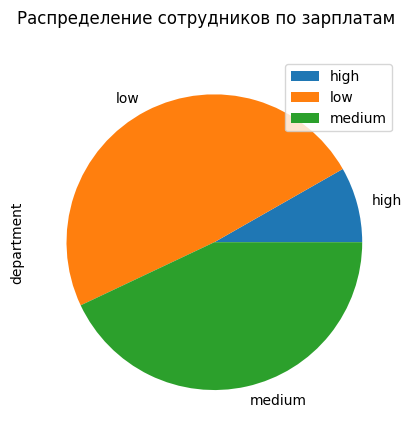

In [9]:
df_salary.plot(kind='pie', title='Распределение сотрудников по зарплатам', subplots=True)

# **6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности**

<Axes: xlabel='salary', ylabel='count'>

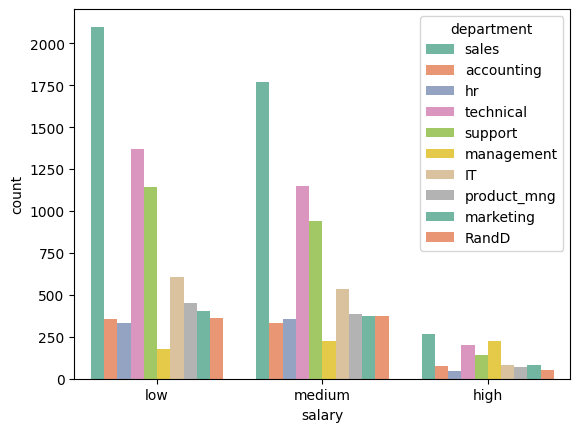

In [10]:
sns.countplot(x='salary', hue='department', data = df, palette='Set2')

# **7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом**

In [11]:
df_small = df[['average_montly_hours','salary']]
df_low = df_small[df_small.salary == 'low']
df_high = df_small[df_small.salary == 'high']
# df_low
# df_high

H0: Средние выборок одинаковы / сотрудники проводят на работе одинаковое количество времени, не зависимо от оклада

H1: Средние выборок различаются / сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

In [12]:
staе, p = st.ttest_ind (a=df_low['average_montly_hours'], b=df_high['average_montly_hours'], equal_var = False)
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, сотрудники с высоким и низким окладом проводят на работе примерно одинаковое время')
else:
    print('Отклоняем нулевую гипотезу, сотрудники с высоким окладом проводят на работе больше времени, чем  сотрудники с низким окладом')

Не отклоняем нулевую гипотезу, сотрудники с высоким и низким окладом проводят на работе примерно одинаковое время


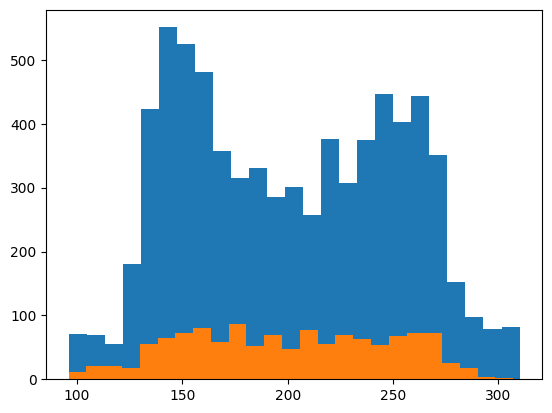

In [13]:
plt.hist(df_low['average_montly_hours'], bins=25);
plt.hist(df_high['average_montly_hours'], bins=25);

# **8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):**


*   Доля сотрудников с повышением за последние 5 лет
*   Средняя степень удовлетворенности
*   Среднее количество проектов

In [14]:
df_left_y = df[df.left == 1]
df_left_n = df[df.left == 0]
df_left_y
# df_left_n

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [15]:
v = df_left_y[df_left_y.promotion_last_5years == 1].count() / df_left_y['promotion_last_5years'].count() * 100
v[0].round(2)

0.53

In [16]:
def general_indicators(data):
  '''
  Эта функция считает:
  Долю сотрудников с повышением за последние 5 лет в процентах
  Средняя степень удовлетворенности
  Среднее количество проектов
  '''
  salary_increase = (data[data.promotion_last_5years == 1].count() / data['promotion_last_5years'].count() * 100)[0].round(2)
  satisfaction = data['satisfaction_level'].mean().round(2)
  number_of_projects = data['number_project'].mean().round(2)

  return print(f'Доля сотрудников с повышением за последние 5 лет: {salary_increase}%; \nСредняя степень удовлетворенности: {satisfaction}; \nСреднее количество проектов: {number_of_projects}.')

In [17]:
general_indicators(df_left_y)
print('-----------')
general_indicators(df_left_n)

Доля сотрудников с повышением за последние 5 лет: 0.53%; 
Средняя степень удовлетворенности: 0.44; 
Среднее количество проектов: 3.86.
-----------
Доля сотрудников с повышением за последние 5 лет: 2.63%; 
Средняя степень удовлетворенности: 0.67; 
Среднее количество проектов: 3.79.


# **9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки.**

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import sklearn

In [94]:
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = np.array(df['left'])

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [96]:
lda = LinearDiscriminantAnalysis()

In [97]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [98]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [99]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
3745,0,0
3746,1,0
3747,0,0
3748,0,1


In [100]:
accuracy_score(y_test, lda.predict(X_test)) # точность получилась около 75%, что довольно неплохо

0.7536